## Lets Try to build transfer learning model - using functional APi
(Fine-Tuning)

In [ ]:
# let import dattime
import datetime

In [ ]:
# NOw just import the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-10-13 18:51:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  93.5MB/s    in 1.7s    

2025-10-13 18:51:20 (93.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Lets walk through the directories
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [ ]:
# Creating Training and test Directroy

test_dir="10_food_classes_10_percent/train/"
train_dir="10_food_classes_10_percent/test/"

## Create Data input using tf.keras.preprocessing.image_dataset_from_directory:
we are using this instead of ImageDataGenerator as it is fast thant ImageDataGenerator and will can use for larger data-sets

In [ ]:
#create a data input
import tensorflow as tf
IMG_Size=(224,224)

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               batch_size=32,
                                                               label_mode="categorical",
                                                              image_size=IMG_Size)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_Size,
                                                              label_mode="categorical")

train_data

Found 2500 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Lets check the trainning data-datatype
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# lets check the class names
class_names=train_data.class_names
cals

In [ ]:
# lets take image, label from batch 1
for image,label in train_data.take(1):
  print(image,label)

tf.Tensor(
[[[[1.80998886e+02 1.21998886e+02 7.79988861e+01]
   [1.81657364e+02 1.22657364e+02 8.25145111e+01]
   [1.76582596e+02 1.16796875e+02 8.12254486e+01]
   ...
   [1.55578201e+02 1.07006721e+02 7.70067215e+01]
   [1.54451981e+02 1.05451973e+02 7.46416931e+01]
   [1.50487732e+02 1.01487732e+02 6.88995438e+01]]

  [[1.81393967e+02 1.22393974e+02 8.03939743e+01]
   [1.73792404e+02 1.13936386e+02 7.65044632e+01]
   [1.78667419e+02 1.18881699e+02 8.33102646e+01]
   ...
   [1.50160675e+02 1.03160675e+02 7.51606750e+01]
   [1.48041336e+02 9.81853180e+01 7.07421951e+01]
   [1.54983322e+02 1.05983322e+02 7.51685333e+01]]

  [[1.82324768e+02 1.22731026e+02 8.57310257e+01]
   [1.79640625e+02 1.20046875e+02 8.30468750e+01]
   [1.79577011e+02 1.20154022e+02 8.42924118e+01]
   ...
   [1.56587097e+02 1.08587097e+02 8.57902222e+01]
   [1.52030136e+02 1.04827011e+02 7.94363861e+01]
   [1.49514359e+02 9.99931641e+01 7.46125031e+01]]

  ...

  [[1.60766739e+02 8.67667389e+01 2.27421875e+01]
   [1

## Building a Transfer Learning Model using Keras functional API

In [ ]:
## Creating a Tensorboard Callback

def create_tensorboard_callback(dir_name,experiment_name):
  Log_dir=dir_name +"/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d")
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=Log_dir)

  return tensorboard_callback

In [ ]:
# Create a base model with tf.keras.applications
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the Base MOdel
base_model.trainable=False

#Create Input into base model
inputs=tf.keras.layers.Input(shape=(224,224,3))

# pass input to the base model
x=base_model(inputs)

# add a layer to base model
x=tf.keras.layers.GlobalAveragePooling2D()(x)

# Create a output activation layer
output=tf.keras.layers.Dense(10,activation="softmax")(x)

# add the input and output layer
model_0=tf.keras.Model(inputs,output)

# compile a model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])
# Fit the model
model_0.fit(train_data,
            epochs=2,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback("Tensor_Hub","Model_0")])



Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - Accuracy: 0.5079 - loss: 1.6026 - val_Accuracy: 0.7960 - val_loss: 0.7649
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - Accuracy: 0.8618 - loss: 0.5780 - val_Accuracy: 0.8200 - val_loss: 0.6120
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - Accuracy: 0.8853 - loss: 0.4284 - val_Accuracy: 0.8387 - val_loss: 0.5531
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - Accuracy: 0.9080 - loss: 0.3517 - val_Accuracy: 0.8467 - val_loss: 0.5191
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - Accuracy: 0.9136 - loss: 0.3088 - val_Accuracy: 0.8493 - val_loss: 0.5057
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - Accuracy: 0.9264 - loss: 0.2836 - val_Accuracy: 0.8587 - val_loss: 0.4909
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - Accuracy: 0.9293 - loss: 0.2527 - val_Accuracy: 0.8547 - val_loss: 0.4895
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - Accuracy: 0.9400 - loss: 0.2263 - val_Accuracy: 0.8600 - v

In [ ]:
import matplotlib.pyplot as plt
import random
# Now let just create a function which can be use for predicting outcome on the custome image
def load_and_prep(filename,img_shape=224):
  img=tf.io.read_file(filename)
  # Decode and read
  img=tf.image.decode_image(img)

  #resize the decode image
  img=tf.image.resize(img,size=[img_shape,img_shape])

  #rescale a img
  img=img/255.
  return img

In [ ]:
# Creating a function to plot the custom image with the class name

def pred_and_plot(model,filename,class_names):
  img=load_and_prep(filename)

  # make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predict class
  pred_class=class_names[int(tf.round(pred)[0][0])]

  #plot the image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


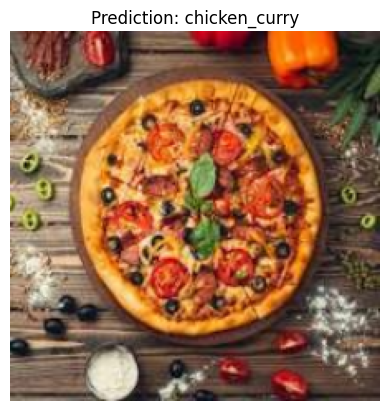

In [ ]:
pred_and_plot(model_0,"/content/pizza_test",class_names)

## Now let just try some model experiment using Feature extraction:
model_1: transfer learning using Feature Extraction on 1% of augmented Data\

model_2: TRansfer learning using Feature Extraction on 10% of augmented Data

model_3: Fine-tune the Model 2 checkpoint on 10% of the training data with data augmentation.

model_4: Fine-tune the MOdel-2 checkpoint on 100% of the traing data with data augmentation.

# Lets Begin with Model_1

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-10-14 09:21:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 192.178.156.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  34.6MB/s    in 4.2s    

2025-10-14 09:21:55 (30.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import os
# lets walk through directories
for dirpath,dirnames,filenames in os.walk("10_food_classes_1_percent"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There a

In [ ]:
# Now let just create the training and testing directories
train_dir="10_food_classes_1_percent/train/"
test_dir="10_food_classes_1_percent/test/"


In [ ]:
# now lets load the data using tf.keras.preprocessing.image_dataset_from_directory
import tensorflow as tf

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               batch_size=32,
                                                               image_size=(224,224))

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(224,224))

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## adding Data augmentation right into the model:
using tf.keras.layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

## Let visualize what does data augmentation done to our data

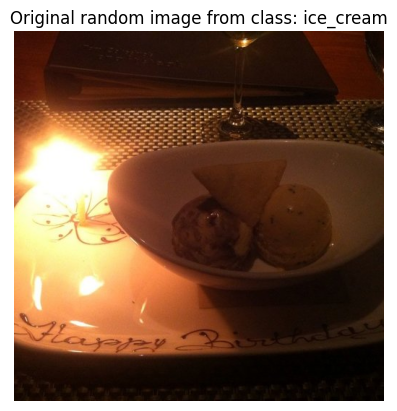

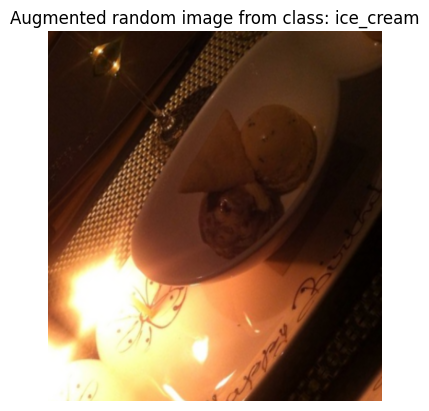

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class=random.choice(train_data.class_names)
target_dir=train_dir + target_class

random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir + "/" + random_image

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)

# Augmented Image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);



## Its time to build feature extraction model on pur 1 percent of the data

In [ ]:
#setup input shape and base model,freezing the base model layer
input_shape=(224,224,3)
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable =False

# Create a Input Layer
inputs=tf.keras.layers.Input(shape=input_shape)

#Add in data augmentation sequential model in layer
x=data_augmentation(inputs)

#give base model inputs(after augmentation) and don't train it
x=base_model(x,training=False)

# Pool output feature of base model
x=layers.GlobalAveragePooling2D()(x)

# put dense layer on as output
output=tf.keras.layers.Dense(10,activation="softmax")(x)

# make a model with inputs and outputs
model_1=keras.Model(inputs,output)

# Compile a model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit a model
history_1=model_1.fit(train_data,
            epochs=5,steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.1222 - loss: 2.2958 - val_accuracy: 0.2284 - val_loss: 2.1352
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2230 - loss: 2.1269 - val_accuracy: 0.3064 - val_loss: 2.0298
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3888 - loss: 1.9972 - val_accuracy: 0.4108 - val_loss: 1.9339
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4857 - loss: 1.8240 - val_accuracy: 0.4776 - val_loss: 1.8468
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5695 - loss: 1.6955 - val_accuracy: 0.5296 - val_loss: 1.7640


In [ ]:
# Creating a function for loss curve

def plot_loss_curve(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # plot the loss curve
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy curve
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("acuracy")
  plt.xlabel("Epochs")
  plt.legend()

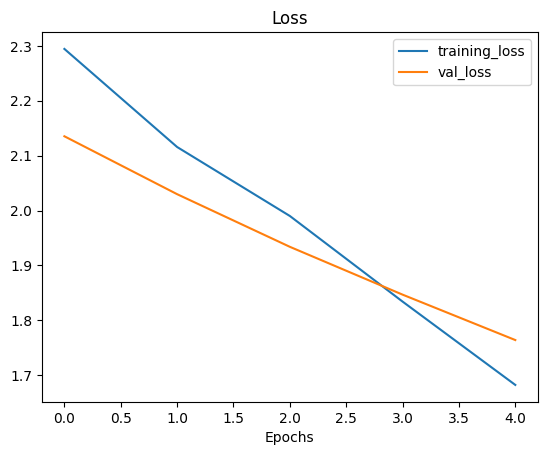

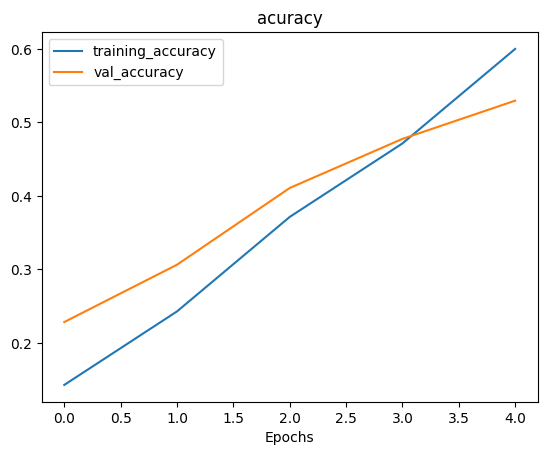

In [ ]:
# plot a loss curve for model_1
plot_loss_curve(history_1)

In [ ]:
# Lets evaluate on our test data
result_1=model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5454 - loss: 1.7465


## Succesfully done with model_1

## Lets jumps to a model_2 using the 10% data with data augmentation from the Scratch

In [ ]:
#lets import a data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-10-14 10:09:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  41.3MB/s    in 4.6s    

2025-10-14 10:09:06 (34.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# lets walk through the diectories
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [ ]:
# Lets create a training and test directories
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"


In [ ]:
# lets load the data from the directories

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               batch_size=32,
                                                               label_mode="categorical",
                                                               image_size=(224,224))

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=(224,224),
                                                              label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Lets now do some data augmentation on our data using the Serquential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

In [ ]:
# Now lets just build our model from scratch
input_shape=(224,224,3)
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

# Create a input layer
inputs=tf.keras.layers.Input(shape=input_shape)
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
output=layers.Dense(10,activation="softmax")(x)
model_2=tf.keras.Model(inputs,output)

# compile a model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit a model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 659ms/step - accuracy: 0.2184 - loss: 2.2298 - val_accuracy: 0.6244 - val_loss: 1.5175
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 552ms/step - accuracy: 0.5824 - loss: 1.5244 - val_accuracy: 0.7148 - val_loss: 1.1222
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 502ms/step - accuracy: 0.6932 - loss: 1.2000 - val_accuracy: 0.7724 - val_loss: 0.8973
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 503ms/step - accuracy: 0.7693 - loss: 0.9690 - val_accuracy: 0.8100 - val_loss: 0.7621
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 532ms/step - accuracy: 0.7853 - loss: 0.8652 - val_accuracy: 0.8232 - val_loss: 0.6969


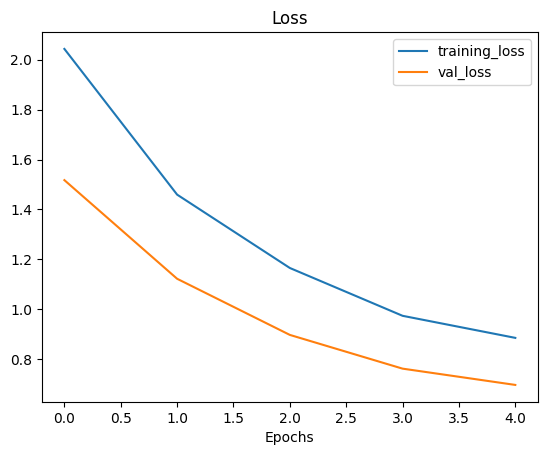

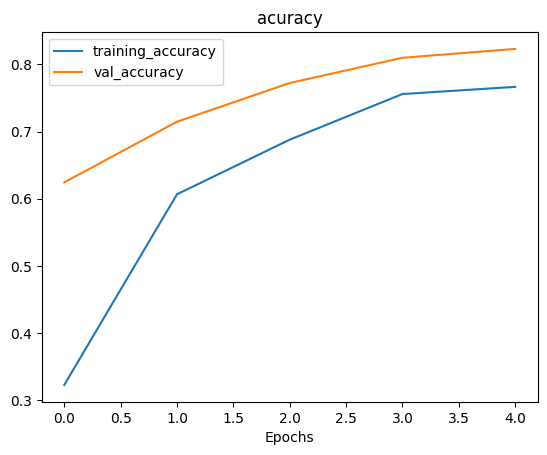

In [ ]:
# Lets plot the loss curve
plot_loss_curve(history_2)

In [ ]:
result_2=model_2.evaluate(test_data)
result_2

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8262 - loss: 0.6896


[0.69688481092453, 0.823199987411499]